In [3]:
# !pip install WordCloud

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarvadnya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data = pd.read_csv('flipkart_data.csv')
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [7]:
data.size

19952

In [8]:
# unique ratings
pd.unique(data['rating'])

array([5, 4, 1, 3, 2], dtype=int64)

<Axes: xlabel='rating', ylabel='count'>

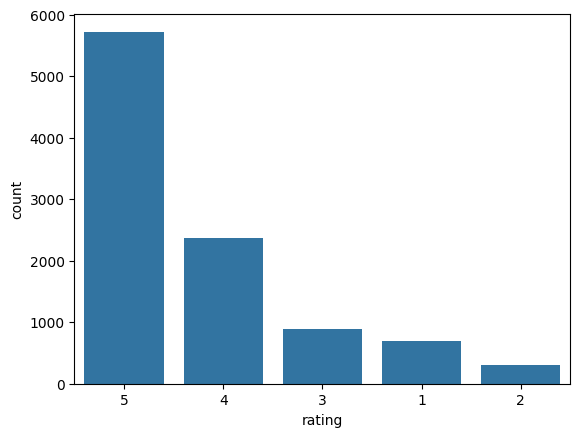

In [9]:
sns.countplot(data=data,
			x='rating',
			order=data.rating.value_counts().index)

In [10]:
# rating label(final)
pos_neg = []
for i in range(len(data['rating'])):
	if data['rating'][i] >= 4:
		pos_neg.append(1)
	else:
		pos_neg.append(0)

data['label'] = pos_neg

In [11]:
nltk.download('punkt')
from tqdm import tqdm

def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        # Removing punctuations
        sentence = re.sub(r'[^\w\s]', '', sentence)

        # Converting lowercase and removing stopwords
        preprocessed_text.append(' '.join(token.lower() for token in nltk.word_tokenize(sentence)
                                if token.lower() not in stopwords.words('english')))

    return preprocessed_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarvadnya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review

100%|██████████| 9976/9976 [01:33<00:00, 106.99it/s]


In [13]:
data.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,1
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


In [14]:
data["label"].value_counts()

label
1    8091
0    1885
Name: count, dtype: int64

In [15]:
# consolidated = ' '.join(
# 	word for word in data['review'][data['label'] == 1].astype(str))
# wordCloud = WordCloud(width=1600, height=800,
# 					random_state=21, max_font_size=110)
# plt.figure(figsize=(15, 10))
# plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [16]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()

In [17]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
import pickle
with open('Models/tfid_vectorizer.pkl','wb') as file:
   pickle.dump(cv,file)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
													test_size=0.33,
													stratify=data['label'],
													random_state = 42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

model2=RandomForestClassifier()
model2.fit(X_train,y_train)

#testing the model
pred = model.predict(X_test)
print(accuracy_score(y_test,pred))

pred2 = model2.predict(X_test)
print(accuracy_score(y_test,pred2))

0.8481627695110842
0.8852110537503796


In [24]:
with open('Models/decision_tree_classify.pkl','wb') as file:
   pickle.dump(model,file)

In [25]:
with open('Models/random_forest_classify.pkl','wb') as file:
   pickle.dump(model2,file)

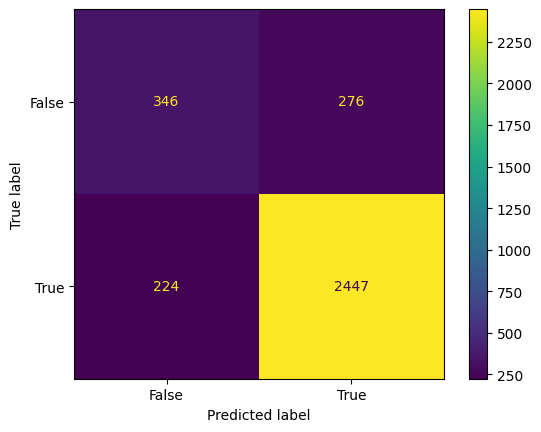

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords


def text_preprocesor(text):
   ##Removing special characters
   text=re.sub('[^a-z A-Z 0-9]','',text)

   ##Remove stopwords
   text=text.split()
   text=[y for y in text if y not in stopwords.words('english')]
   text=" ".join(text)

   ## Remove url 
   text=re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(text))

   ##Remove html tags
   text=BeautifulSoup(text,'lxml').get_text()

   return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarvadnya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
test_data=[
   "This product is amazing! Totally worth the price.",
   "Worst purchase ever. The quality is terrible.",
   "It's okay, not the best but not the worst either.",
   "I absolutely love this! Highly recommended.",
   "Terrible experience. Will never buy this again.",
   "Quite decent for the price. Could be better.",
   "Fantastic product! Exceeded my expectations.",
   "The product is average, nothing special.",
   "Completely disappointed. It broke within a week.",
   "Great value for money. Very satisfied with the purchase.",
]

In [ ]:
sentiments_count=[]
def test_reviews(text):
   processed_review=text_preprocesor(text)
   vectorized_review=cv.transform([processed_review]).toarray()
   prediction = model2.predict(vectorized_review)

   # Output the prediction
   sentiment = "Positive" if prediction[0] == 1 else "Negative"
   sentiments_count.append(sentiment)
   print(f"{text}")
   print(f"Predicted Sentiment: {sentiment}")
   print("")
   return " "

In [ ]:
for data in test_data:
   print(f"{test_reviews(data)}")

This product is amazing! Totally worth the price.
Predicted Sentiment: Positive

 
Worst purchase ever. The quality is terrible.
Predicted Sentiment: Negative

 
It's okay, not the best but not the worst either.
Predicted Sentiment: Negative

 
I absolutely love this! Highly recommended.
Predicted Sentiment: Positive

 
Terrible experience. Will never buy this again.
Predicted Sentiment: Positive

 
Quite decent for the price. Could be better.
Predicted Sentiment: Positive

 
Fantastic product! Exceeded my expectations.
Predicted Sentiment: Positive

 
The product is average, nothing special.
Predicted Sentiment: Negative

 
Completely disappointed. It broke within a week.
Predicted Sentiment: Negative

 
Great value for money. Very satisfied with the purchase.
Predicted Sentiment: Positive

 


In [ ]:
sentiments_count

['Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive']

In [ ]:
# import pickle
# with open('reviews_sentiments.pkl','wb') as file:
#    pickle.dump(model,file)

In [ ]:
# from sklearn.pipeline import Pipeline

# class TextPreprocessor():
#    def fit(self,X,y=None):
#       return self
   
#    def transform(self,X):
#       return [text_preprocesor(text) for text in X]

# sentiment_pipeline=Pipeline([
#    ('preprocessor',TextPreprocessor()),
#    ('vectorizer',)
# ])
